In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vitthalmadane/ts-temp-1")

print("Path to dataset files:", path)

Path to dataset files: /Users/lubovsoldatenko/.cache/kagglehub/datasets/vitthalmadane/ts-temp-1/versions/2


Набор данных представляет собой значения температуры воздуха в помещении с учетом времени:
1) Hourly _Temp содержит среднее значение температуры приточного воздуха в градусах Цельсия в час,
2) Datetime показывает дату и час записи данных

In [2]:
import data_loader as dl

# Указание пути к CSV-файлу
file_path = '/Users/lubovsoldatenko/DataspellProjects/datascience/HW6/data/MLTempDataset1.csv'

# Загрузка данных
loader = dl.LoadData()
df = loader.load_csv(file_path)

Файл /Users/lubovsoldatenko/DataspellProjects/datascience/HW6/data/MLTempDataset1.csv успешно загружен.


In [3]:
# Просмотр данных
df.head(10)

,Unnamed: 0,Datetime,Hourly_Temp
0,0,2022-01-04 00:00:00,20.867
1,1,2022-01-04 01:00:00,21.000
2,2,2022-01-04 02:00:00,20.867
3,3,2022-01-04 03:00:00,20.650
4,4,2022-01-04 04:00:00,20.400
5,5,2022-01-04 05:00:00,20.100
6,6,2022-01-04 06:00:00,19.800
7,7,2022-01-04 07:00:00,19.500
8,8,2022-01-04 08:00:00,19.400
9,9,2022-01-04 09:00:00,19.500


In [4]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Datetime     7056 non-null   object 
 2   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.5+ KB


In [5]:
# Базовая статистика
df.describe()

,Unnamed: 0,Hourly_Temp
count,7056.000000,7056.000000
mean,3527.500000,21.867468
std,2037.036082,6.737313
min,0.000000,5.350000
25%,1763.750000,18.400000
50%,3527.500000,24.033000
75%,5291.250000,26.333000
max,7055.000000,36.500000


In [6]:
# Количество значений в датасете
len(df)

7056

In [7]:
from HW6.data_analyzer import MissingValuesHandler

# Создаем объект обработчика
handler = MissingValuesHandler(df)

# Поиск дубликатов
handler.find_duplicates()


 Найдено 0 дубликатов.


,Unnamed: 0,Datetime,Hourly_Temp


In [8]:
# Подсчет пропущенных значений
handler.count_missing_values()

Unnamed: 0     0
Datetime       0
Hourly_Temp    0
dtype: int64

In [9]:
# Отчет о пропущенных данных
handler.missing_values_report()


 Отчет о пропущенных значениях:
             Missing Values  Missing Percentage
Unnamed: 0                0                 0.0
Datetime                  0                 0.0
Hourly_Temp               0                 0.0


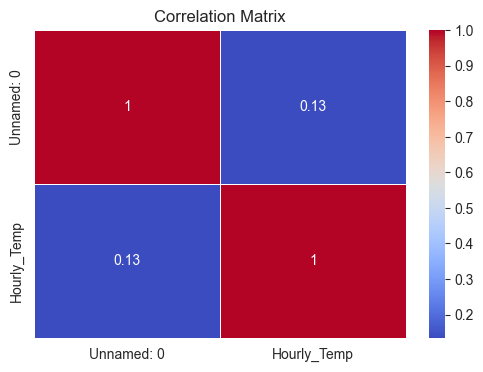

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Создаем корреляционную матрицу для числовых колонок
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Данные не имеют дубликатов и пропусков

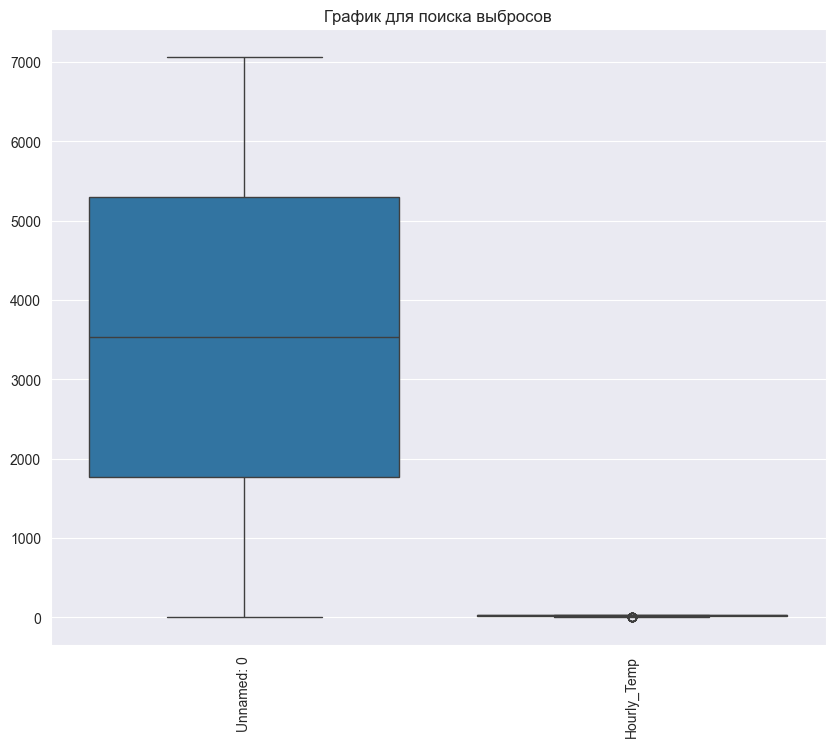

In [11]:
# Ящик с усами
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('График для поиска выбросов')
plt.show()

In [12]:
# Поиск выбросов для параметра Hourly_Temp consumption
Q1 = df['Hourly_Temp'].quantile(0.25)
Q3 = df['Hourly_Temp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Hourly_Temp'] < lower_bound) | (df['Hourly_Temp'] > upper_bound)]
print(f'Найдено {len(outliers)} выбросов')

Найдено 12 выбросов


In [13]:
# Удаление выбросов
df = df[(df['Hourly_Temp'] >= lower_bound) & (df['Hourly_Temp'] <= upper_bound)]
print(f'Очищенный набор данных содержит {len(df)} записей')

Очищенный набор данных содержит 7044 записей


Данные были обработаны и не содержат выбросов

Анализ временного ряда


/var/folders/91/pkfxltzd5fd66hd8w6yxgpb40000gn/T/ipykernel_13129/117080872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')


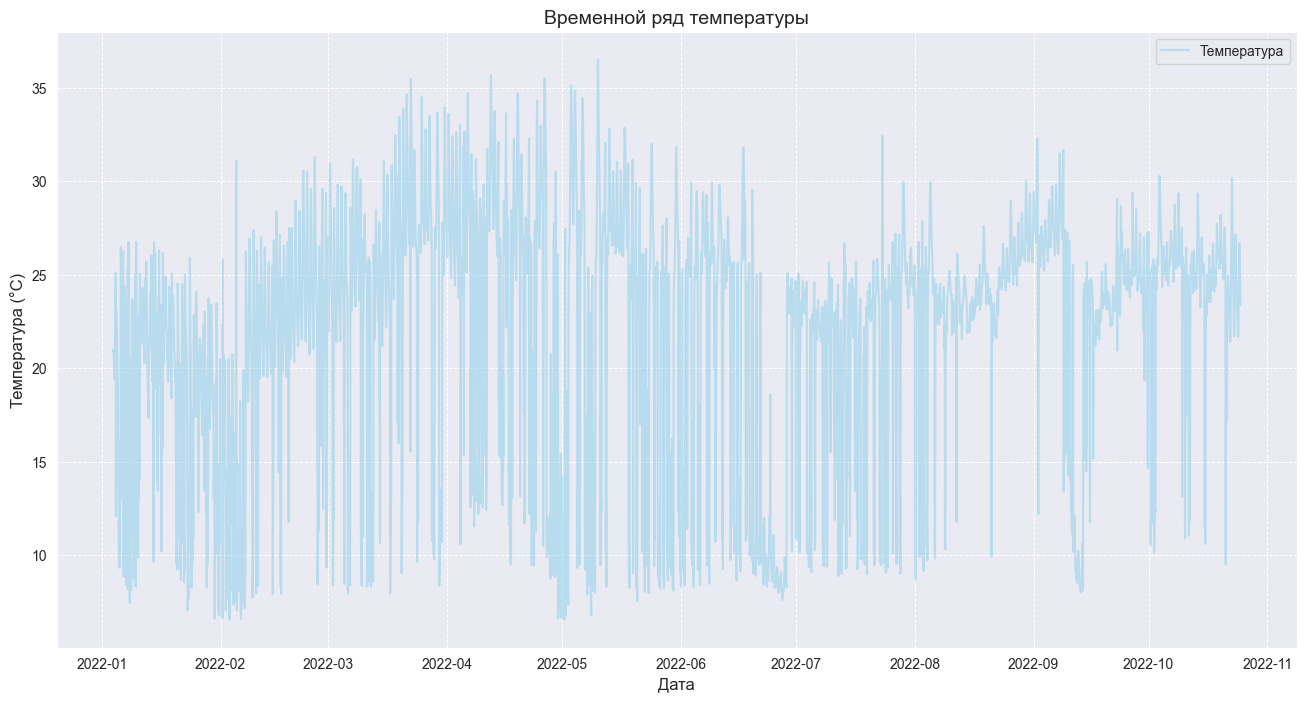

<Figure size 3000x400 with 0 Axes>

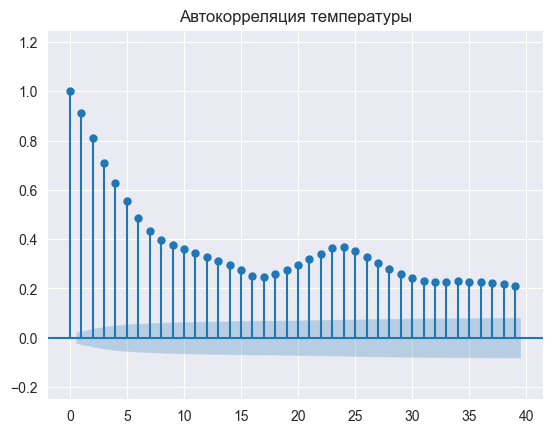

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

# Преобразование колонки 'Date' в формат datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Сортируем данные по дате
df = df.sort_values(by='Datetime')

# Построение графика
plt.figure(figsize=(16, 8))
plt.plot(df['Datetime'], df['Hourly_Temp'], color='skyblue', label='Температура', alpha=0.5)
plt.title('Временной ряд температуры', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(fontsize=10)
plt.show()

# Построение автокорреляции
plt.figure(figsize=(30, 4))
plot_acf(df['Hourly_Temp'])

# Настройка диапазонов для оси Y
y_range = (-0.25, 1.25)
plt.ylim(y_range)

plt.title('Автокорреляция температуры')
plt.show()

In [15]:
# Проведение теста Дики-Фуллера
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Hourly_Temp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Анализ стационарности и сезонности
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    if result[1] > 0.05:
        print("Ряд нестационарен -> требуется дифференцирование")
    else:
        print("Ряд стационарен")

check_stationarity(df['Hourly_Temp'])

ADF Statistic: -9.364559
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -9.365
p-value: 0.000
Ряд стационарен


Результаты теста Дики-Фуллера показыввают, что ряд стационарный:

ADF статистика: -9.364559 - отрицательное значениеи по абсолютной величине значительно превышает критические значения, что указывает на стационарность ряда.

p-значение: приблизительно 0.000000. Это гораздо меньше порогового значения 0.05,
что позволяет отвергнуть нулевую гипотезу о нестационарности ряда.

Критические значения: показаны для разных уровней значимости (1%, 5% и 10%).
ADF статистика находится ниже всех этих критических значений, что подтверждает стационарность ряда.


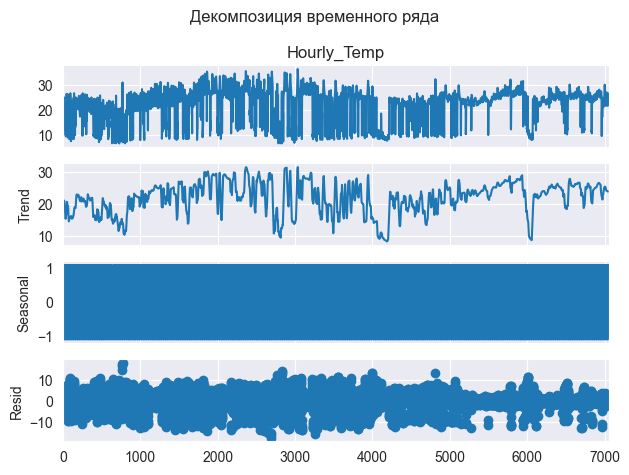

In [16]:
# Визуализация сезонности
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Hourly_Temp'], period=24)  # Для суточной сезонности
decomposition.plot()
plt.suptitle('Декомпозиция временного ряда')
plt.tight_layout()
plt.show()

ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28325.495, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28267.304, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28263.895, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28323.495, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28265.584, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=28265.003, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=28261.895, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=28263.584, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=28263.004, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=28265.304, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.64 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.503 seconds
                           

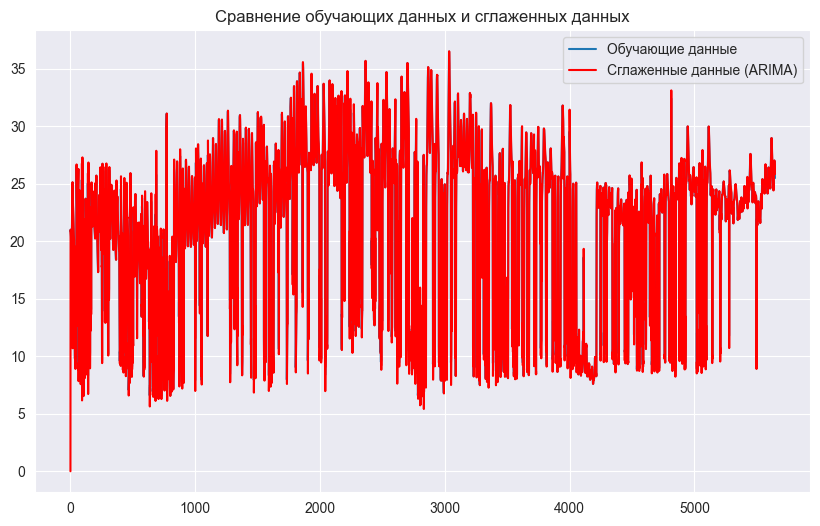

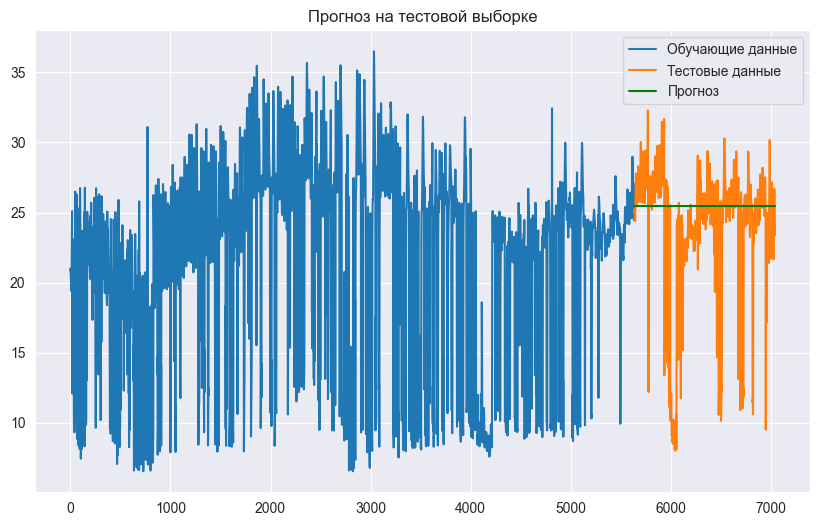

Mean Absolute Error (MAE): 2.840
Mean Squared Error (MSE): 24.728
Root Mean Squared Error (RMSE): 4.973
Mean Absolute Percentage Error (MAPE): 19.226%


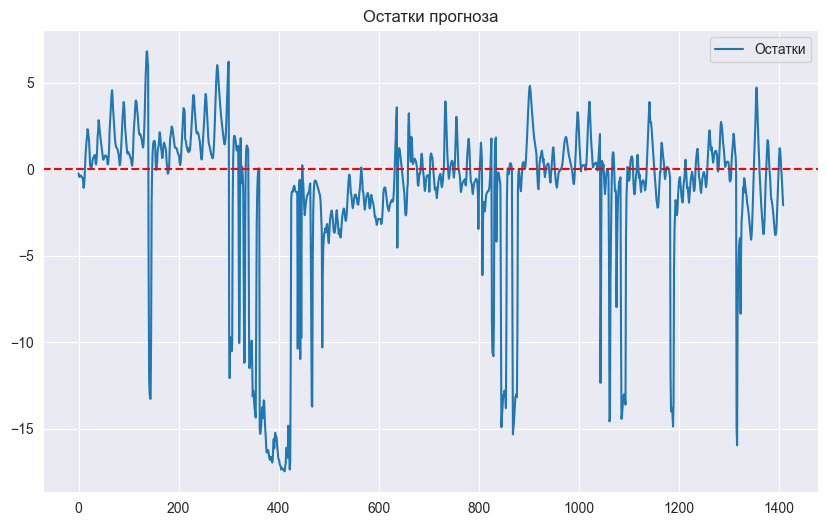

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from pmdarima import auto_arima

# Отключение предупреждений
warnings.filterwarnings("ignore")

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(df['Hourly_Temp']) * 0.8)
train_data, test_data = df['Hourly_Temp'][:train_size], df['Hourly_Temp'][train_size:]

# Автоматический подбор параметров (p, d, q)
model_auto = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)
print(model_auto.summary())

# Прогнозирование для тестовой выборки
model_fit = model_auto.fit(train_data)
forecast_test = model_fit.predict(n_periods=len(test_data))

# Получение сглаженных значений на обучающей выборке
fitted_values = model_fit.predict_in_sample()

# Визуализация исходных данных и сглаженных данных с использованием модели ARIMA
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Обучающие данные')
plt.plot(fitted_values, color='red', label='Сглаженные данные (ARIMA)')
plt.title('Сравнение обучающих данных и сглаженных данных')
plt.legend()
plt.show()

# Визуализация прогноза на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Обучающие данные')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Тестовые данные')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), forecast_test, color='green', label='Прогноз')
plt.title('Прогноз на тестовой выборке')
plt.legend()
plt.show()

# Метрики качества
mae = mean_absolute_error(test_data, forecast_test)
mse = mean_squared_error(test_data, forecast_test)
rmse = np.sqrt(mse)

# Убедимся, что длины и индексы совпадают
test_data = test_data.reset_index(drop=True)
forecast_test = forecast_test.reset_index(drop=True)

# Создаем маску без нулевых значений
non_zero_mask = test_data != 0

# Вычисляем MAPE
mape = np.mean(np.abs((test_data[non_zero_mask] - forecast_test[non_zero_mask]) / test_data[non_zero_mask])) * 100

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# Визуализация остатков
residuals = test_data - forecast_test
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Остатки')
plt.axhline(0, linestyle='--', color='red')
plt.title('Остатки прогноза')
plt.legend()
plt.grid(True)
plt.show()

Метод скользящего среднего (Moving Average) и Экспоненциальное скользящее среднее (ema)

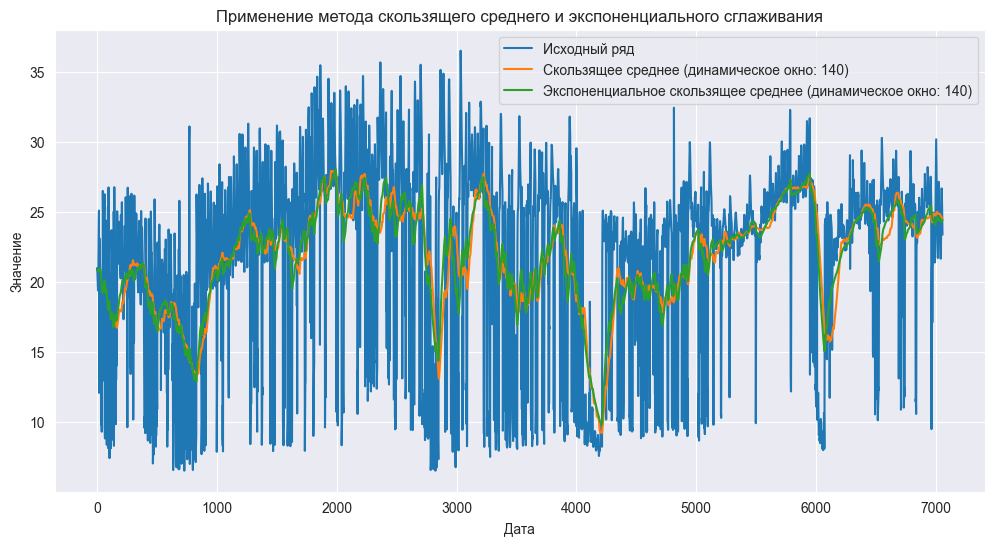

In [18]:
import matplotlib.pyplot as plt

# Автоматический расчет размера окна
window_size = max(1, len(df['Hourly_Temp']) // 50)  # Пример: 1/50 от общего числа данных или минимум 1

# Метод скользящего среднего (Moving Average)
moving_average = df['Hourly_Temp'].rolling(window=window_size).mean()  # для заполнения пустых значений: .fillna(method='bfill')

# Применяем экспоненциальное скользящее среднее
ema = df['Hourly_Temp'].ewm(span=window_size, adjust=False).mean()

# Визуализируем исходный временной ряд, скользящее среднее и экспоненциальное сглаживание
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Hourly_Temp'], label='Исходный ряд')
plt.plot(moving_average.index, moving_average, label=f'Скользящее среднее (динамическое окно: {window_size})')
plt.plot(ema.index, ema, label=f'Экспоненциальное скользящее среднее (динамическое окно: {window_size})')
plt.title("Применение метода скользящего среднего и экспоненциального сглаживания")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()


SARIMA (Seasonal ARIMA)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41538D+00    |proj g|=  7.24249D-01


 This problem is unconstrained.



At iterate    5    f=  3.07263D+00    |proj g|=  8.60058D-02

At iterate   10    f=  2.84077D+00    |proj g|=  9.61055D-02

At iterate   15    f=  2.82970D+00    |proj g|=  2.09302D-01

At iterate   20    f=  2.82493D+00    |proj g|=  7.52900D-03

At iterate   25    f=  2.82424D+00    |proj g|=  6.97516D-02

At iterate   30    f=  2.81632D+00    |proj g|=  8.02389D-02

At iterate   35    f=  2.81263D+00    |proj g|=  2.62857D-02

At iterate   40    f=  2.81012D+00    |proj g|=  1.83366D-01

At iterate   45    f=  2.80938D+00    |proj g|=  4.92759D-03

At iterate   50    f=  2.80936D+00    |proj g|=  8.12197D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

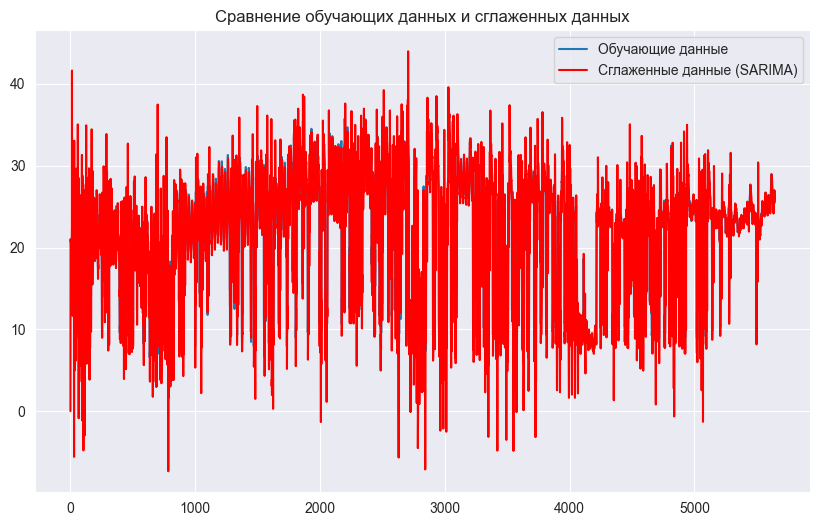

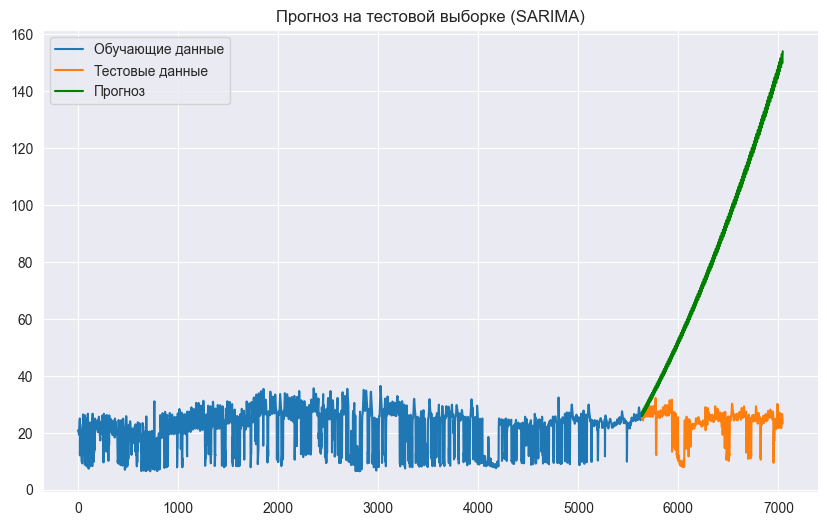

Mean Absolute Error (MAE): 59.517
Mean Squared Error (MSE): 4887.376
Root Mean Squared Error (RMSE): 69.910
Mean Absolute Percentage Error (MAPE): 269.511%


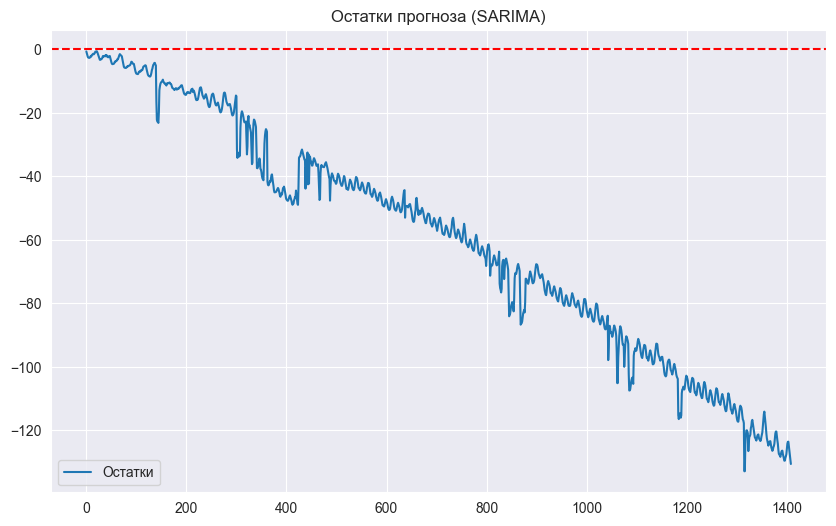

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Отключение предупреждений
warnings.filterwarnings("ignore")

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(df['Hourly_Temp']) * 0.8)
train_data, test_data = df['Hourly_Temp'][:train_size], df['Hourly_Temp'][train_size:]

# Построение модели SARIMA с произвольными параметрами
model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(0, 2, 1, 12))
model_fit = model.fit()

# Визуализация исходных данных и сглаженных данных с использованием модели SARIMA
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Обучающие данные')
plt.plot(model_fit.fittedvalues, color='red', label='Сглаженные данные (SARIMA)')
plt.title('Сравнение обучающих данных и сглаженных данных')
plt.legend()
plt.show()

# Прогнозирование для тестовой выборки
forecast_test = model_fit.forecast(steps=len(test_data))

# Визуализация прогноза на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_data)), train_data, label='Обучающие данные')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Тестовые данные')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), forecast_test, color='green', label='Прогноз')
plt.title('Прогноз на тестовой выборке (SARIMA)')
plt.legend()
plt.show()

# Убедимся, что длины и индексы совпадают
test_data = test_data.reset_index(drop=True)
forecast_test = forecast_test.reset_index(drop=True)

# Создаем маску без нулевых значений
non_zero_mask = test_data != 0

# Метрики качества
mae = mean_absolute_error(test_data, forecast_test)
mse = mean_squared_error(test_data, forecast_test)
rmse = np.sqrt(mse)

# Убедимся, что длины и индексы совпадают
test_data = test_data.reset_index(drop=True)
forecast_test = forecast_test.reset_index(drop=True)

# Создаем маску без нулевых значений
non_zero_mask = test_data != 0

# Вычисляем MAPE
mape = np.mean(np.abs((test_data[non_zero_mask] - forecast_test[non_zero_mask]) / test_data[non_zero_mask])) * 100


print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# Визуализация остатков
residuals = test_data - forecast_test
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Остатки')
plt.axhline(0, linestyle='--', color='red')
plt.title('Остатки прогноза (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()


LSTM

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Преобразование данных в массив NumPy
data_values =df['Hourly_Temp'].values.reshape(-1, 1)

# Нормализация данных (масштабируйте в диапазон [0, 1])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_values)

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


# Функция для создания последовательных данных для модели LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)


# Определение длины последовательности и создайте последовательные данные
seq_length = 12  # Например, используйте данные за последний год (12 месяцев)
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)


2025-04-04 04:11:07.167532: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1225
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0170
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0116
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0097
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0096
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0099
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0086
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0110
Epoch 13/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0096
Epoch 14/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095
Epoch 15/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


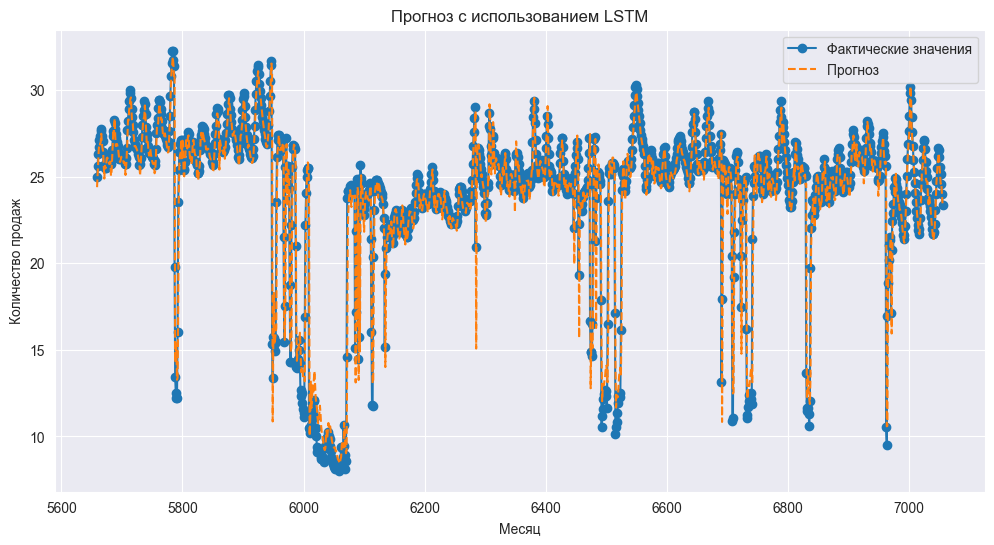

Mean Absolute Error (MAE): 0.730
Mean Squared Error (MSE): 2.956
Root Mean Squared Error (RMSE): 1.719


In [21]:
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Инверсия масштабирования, чтобы получить исходные значения
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Визуализация результатов прогноза
plt.figure(figsize=(12, 6))
plt.plot(df['Hourly_Temp'].index[-len(y_test_inv):], y_test_inv, label='Фактические значения', marker='o')
plt.plot(df['Hourly_Temp'].index[-len(y_test_inv):], y_pred_inv, label='Прогноз ', linestyle='--')
plt.title("Прогноз с использованием LSTM")
plt.xlabel("Месяц")
plt.ylabel("Количество продаж")
plt.legend()
plt.grid(True)
plt.show()

# Оценка точности прогноза
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

LSTM и GRU

Epoch 1/10
4709/4709 - 11s - 2ms/step - loss: 0.0142
Epoch 2/10
4709/4709 - 9s - 2ms/step - loss: 0.0104
Epoch 3/10
4709/4709 - 9s - 2ms/step - loss: 0.0103
Epoch 4/10
4709/4709 - 9s - 2ms/step - loss: 0.0102
Epoch 5/10
4709/4709 - 9s - 2ms/step - loss: 0.0102
Epoch 6/10
4709/4709 - 9s - 2ms/step - loss: 0.0101
Epoch 7/10
4709/4709 - 9s - 2ms/step - loss: 0.0100
Epoch 8/10
4709/4709 - 9s - 2ms/step - loss: 0.0100
Epoch 9/10
4709/4709 - 9s - 2ms/step - loss: 0.0100
Epoch 10/10
4709/4709 - 10s - 2ms/step - loss: 0.0098
Epoch 1/10
4709/4709 - 12s - 3ms/step - loss: 0.0119
Epoch 2/10
4709/4709 - 10s - 2ms/step - loss: 0.0106
Epoch 3/10
4709/4709 - 10s - 2ms/step - loss: 0.0104
Epoch 4/10
4709/4709 - 10s - 2ms/step - loss: 0.0104
Epoch 5/10
4709/4709 - 10s - 2ms/step - loss: 0.0104
Epoch 6/10
4709/4709 - 10s - 2ms/step - loss: 0.0103
Epoch 7/10
4709/4709 - 10s - 2ms/step - loss: 0.0102
Epoch 8/10
4709/4709 - 10s - 2ms/step - loss: 0.0102
Epoch 9/10
4709/4709 - 10s - 2ms/step - loss: 0.0102


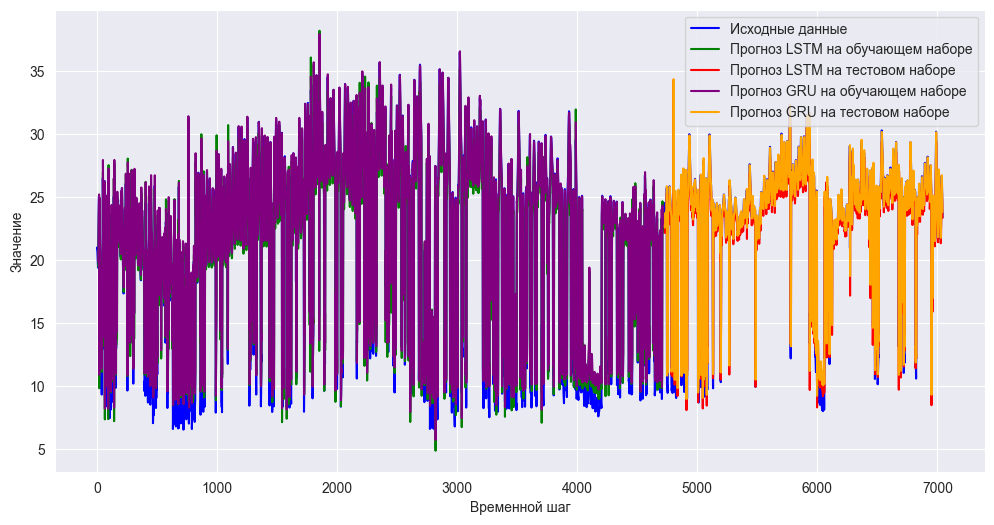

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense


# Преобразуйте данные в массив NumPy
data_values =df['Hourly_Temp'].values.reshape(-1, 1)

# Нормализуйте данные (масштабируйте в диапазон [0, 1])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_values)

# Разбиваем данные на обучающий и тестовый наборы
train_size = int(len(data_scaled) * 0.67)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Функция для создания датасета с последовательными данными
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

look_back = 10  # Количество предыдущих временных шагов для учитывания

X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Подготовка данных в формате (количество примеров, количество временных шагов, количество признаков)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Создаем модель LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(look_back, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель LSTM
model_lstm.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Создаем модель GRU
model_gru = Sequential()
model_gru.add(GRU(units=50, input_shape=(look_back, 1)))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель GRU
model_gru.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Делаем прогнозы с использованием обеих моделей
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

# Инвертируем масштабирование данных
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)

train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)

# Визуализируем прогнозы
train_plot_lstm = np.empty_like(data_scaled)
train_plot_lstm[:] = np.nan
train_plot_lstm[look_back:len(train_predict_lstm) + look_back, 0] = train_predict_lstm[:, 0]

test_plot_lstm = np.empty_like(data_scaled)
test_plot_lstm[:] = np.nan
offset = len(train_predict_lstm) + (look_back * 2)
test_plot_lstm[offset:len(test_predict_lstm) + offset, 0] = test_predict_lstm[:, 0]

train_plot_gru = np.empty_like(data_scaled)
train_plot_gru[:] = np.nan
train_plot_gru[look_back:len(train_predict_gru) + look_back, 0] = train_predict_gru[:, 0]

test_plot_gru = np.empty_like(data_scaled)
test_plot_gru[:] = np.nan
offset = len(train_predict_gru) + (look_back * 2)
test_plot_gru[offset:len(test_predict_gru) + offset, 0] = test_predict_gru[:, 0]

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Исходные данные', color='blue')
plt.plot(train_plot_lstm, label='Прогноз LSTM на обучающем наборе', color='green')
plt.plot(test_plot_lstm, label='Прогноз LSTM на тестовом наборе', color='red')
plt.plot(train_plot_gru, label='Прогноз GRU на обучающем наборе', color='purple')
plt.plot(test_plot_gru, label='Прогноз GRU на тестовом наборе', color='orange')
plt.xlabel('Временной шаг')
plt.ylabel('Значение')
plt.legend()
plt.show()


Сверточные нейронные сети (CNN)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85.9443 - val_loss: 11.6838
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.5342 - val_loss: 10.4376
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1215 - val_loss: 9.1068
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2863 - val_loss: 8.8688
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1256 - val_loss: 8.9576
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1192 - val_loss: 8.6683
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0326 - val_loss: 9.5176
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7143 - val_loss: 8.4681
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6995 - val_loss: 8.3783
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9345 - val_loss: 9.1466
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0924 - val_loss: 8.7308
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

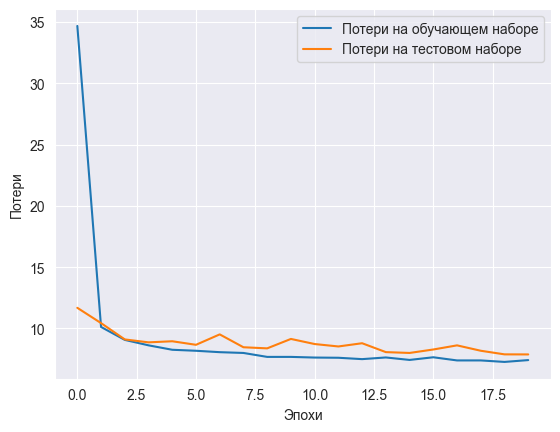

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


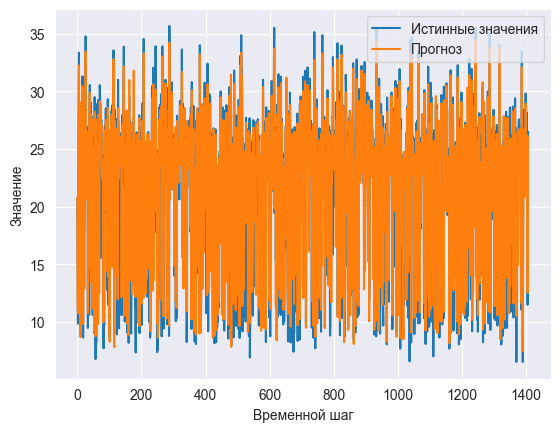

In [23]:
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Преобразуйте данные в массив NumPy
data_values =df['Hourly_Temp'].values.reshape(-1, 1)

# Создание признаков и меток для временного ряда
look_back = 10  # Количество предыдущих временных шагов для учитывания
X, y = [], []
for i in range(len(data_values) - look_back):
    X.append(data_values[i:(i + look_back)])
    y.append(data_values[i + look_back])
X, y = np.array(X), np.array(y)

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных в трехмерный формат для CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Создание модели CNN
model = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(look_back, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # 1 выходной нейрон для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Визуализация результатов обучения
plt.plot(history.history['loss'], label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], label='Потери на тестовом наборе')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Прогнозирование на тестовом наборе
y_pred = model.predict(X_test)

# Визуализация результатов прогнозирования
plt.plot(y_test, label='Истинные значения')
plt.plot(y_pred, label='Прогноз')
plt.xlabel('Временной шаг')
plt.ylabel('Значение')
plt.legend()
plt.show()

Трансформеры

In [24]:
import torch
import torch.nn as nn

class TransformerTimeSeries(nn.Module):
    def __init__(self, input_dim, output_dim, num_layers, num_heads, hidden_dim, dropout_prob):
        super(TransformerTimeSeries, self).__init__()

        # Входной эмбеддинг
        self.embedding = nn.Linear(input_dim, hidden_dim)

        # Многослойный кодировщик
        encoder_layers = nn.TransformerEncoderLayer(hidden_dim, num_heads, dim_feedforward=hidden_dim * 4, dropout=dropout_prob)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)

        # Выходной слой
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Переставляем размерности для трансформера
        x = self.transformer_encoder(x)
        x = x.permute(1, 0, 2)  # Возвращаем исходные размерности
        x = self.output_layer(x)
        return x

# Пример использования модели
input_dim = 1  # Размерность входных данных (один признак)
output_dim = 1  # Размерность выходных данных (один признак)
num_layers = 4  # Количество слоев в трансформере
num_heads = 4  # Количество "голов" в механизме внимания
hidden_dim = 64  # Размер скрытого слоя
dropout_prob = 0.1  # Вероятность дропаута

model = TransformerTimeSeries(input_dim, output_dim, num_layers, num_heads, hidden_dim, dropout_prob)

# Преобразуйте данные в массив NumPy
data_values =df['Hourly_Temp'].values.reshape(-1, 1)

# Преобразуем временной ряд в формат PyTorch и добавим измерение batch_size
time_series_tensor = torch.tensor(data_values, dtype=torch.float32).unsqueeze(1)

# Прогоняем временной ряд через модель
output = model(time_series_tensor)

# Выводим результат
print(output)

tensor([[[-0.5088]],

        [[-0.3900]],

        [[-0.6219]],

        ...,

        [[-0.5524]],

        [[-0.5203]],

        [[-0.4761]]], grad_fn=<ViewBackward0>)


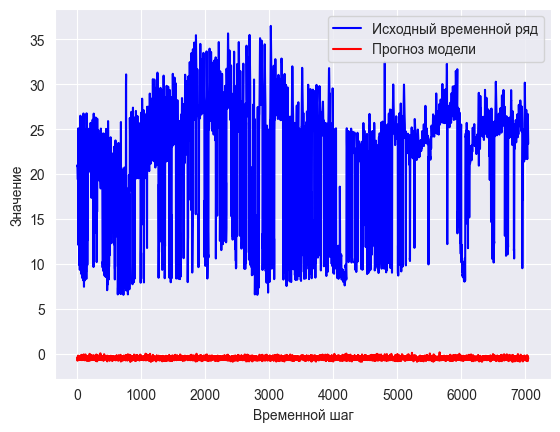

In [25]:
import matplotlib.pyplot as plt

# График исходного временного ряда
plt.plot(data_values, label='Исходный временной ряд', color='blue')

# Преобразуем выход модели в массив NumPy
prediction = output.squeeze(1).detach().numpy()

# График прогноза модели
plt.plot(prediction, label='Прогноз модели', color='red')

plt.xlabel('Временной шаг')
plt.ylabel('Значение')
plt.legend()
plt.show()
